## The Sparks Foundation Task

**Predict the percentage of an student based on the no. of study hours.**

In [101]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [102]:
#Reading the file
url = "http://bit.ly/w-data"
hours_scores = pd.read_csv(url)

In [103]:
hours_scores

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


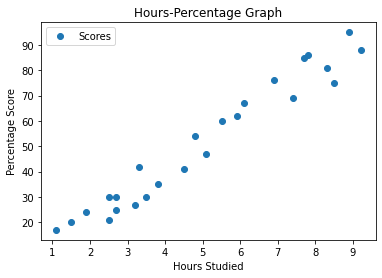

In [104]:
#Plotting a Scatter Plot
hours_scores.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours-Percentage Graph')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [105]:
hours_scores.isna().sum()

Hours     0
Scores    0
dtype: int64

In [106]:
hours_scores.dtypes

Hours     float64
Scores      int64
dtype: object

In [107]:
# create X 

x = hours_scores.drop("Scores",axis = 1)
#create y 
y= hours_scores["Scores"]

In [116]:
#Training and splitting the model
np.random.seed(42)
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2) 

model = LinearRegression()  
model.fit(x_train, y_train) 
model.score(x_test,y_test)

0.9678055545167994

In [117]:
x_train,y_train


(    Hours
 9     2.7
 13    3.3
 1     5.1
 22    3.8
 5     1.5
 2     3.2
 12    4.5
 15    8.9
 3     8.5
 4     3.5
 20    2.7
 17    1.9
 21    4.8
 18    6.1
 24    7.8
 7     5.5
 10    7.7
 14    1.1
 19    7.4
 6     9.2,
 9     25
 13    42
 1     47
 22    35
 5     20
 2     27
 12    41
 15    95
 3     75
 4     30
 20    30
 17    24
 21    54
 18    67
 24    86
 7     60
 10    85
 14    17
 19    69
 6     88
 Name: Scores, dtype: int64)

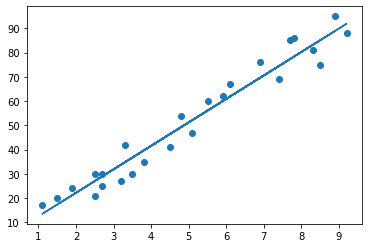

In [118]:
# Plotting the regression line
line = model.coef_*x+model.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [124]:
np.random.seed(42)

y_preds = model.predict(x_test)

In [125]:
y_preds

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [126]:
np.random.seed(42)

# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_preds})  
df 

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


In [135]:
y_preds = model.predict(x_test)
np.mean(y_preds - y_test)

-0.6326596798415224

In [136]:
# You can also test with your own data
hours = np.array([9.25])
prediction = model.predict(hours.reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(prediction[0]))

No of Hours = [9.25]
Predicted Score = 92.38611528261494


##### evaluating from mean_absolute_error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

In [138]:
#evaluating the model using cross_val_score
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(model,x,y,cv = 5))

0.9180771341891051